# Programming for Data analysis assignment
***

Assignment run by JP Quinn
Student: G00411303

## Project outline
***

The goal for this project is to choose a dataset for a real world phenomenon across a range of variables, Investigate the types of variables involved, their likely distributions, and their relationships with each other and then attempt to synthesise a dataset to match the real world data as closely as possible


## Introduction
***

For this project I will be working with a dataset I found on the UCI data repository. https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

The data comes from a bikesharing service and the variables are broken down into

 - date/time information (date/year/month/hour/weekday)
 - weather information (temperature/humidity/windspeed/weathertype(explained below)
 - count of users, split between casual and registered
 
 Weather situation
 The weather is assigned 4 numeric values, explained below
 
  1: Clear, Few clouds, Partly cloudy, Partly cloudy
  2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  
I chose this particular data as I am interested to see the relationship between both the weather and the day of week and the usage of the service, and I am interested in the challenge of replicating these relationships by synthesising a dataset

The data is from usage in Porto, Portugal
 
 

## Working with the data
***

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
## Imports all the packages I will be using throughout the project

In [23]:

bkdata = pd.read_csv('day.csv')
totalusers= bkdata['casual'].sum()+bkdata['registered'].sum()
print (totalusers)
##reads the csv file with the raw data and sums 2 columns to give me the total users over the 2 years 

3292679


<AxesSubplot:title={'center':'Usage by day'}, xlabel='day'>

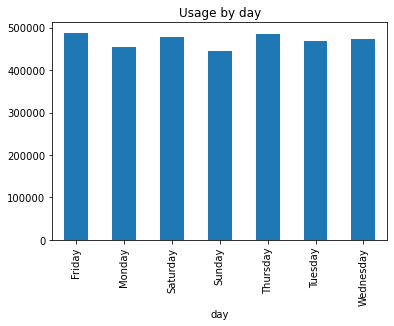

In [24]:
df = pd.DataFrame(bkdata)

df = pd.DataFrame(bkdata)
df['dteday'] =  pd.to_datetime(df['dteday'])
df['day'] = df['dteday'].dt.day_name()
df[['day', 'cnt']].groupby('day').sum().plot(kind='bar', legend=None, title='Usage by day')
## creates datafram (df) using pandas and assigns day name to the date value, I did this as the raw data only contained 
##day numbers and I wanted the chart to be clearer



Looking at the day by day usage we see there isn't a huge variance based on the weekday, The totals by weekday ranging from about 44000 to 47000 in total. In the breakdown below we see the average users per day for the bike rentals is between 4228 and 4690 a day, giving an average of 4504.

In [25]:
dy= bkdata.groupby('weekday').sum()
avdy= bkdata.groupby('weekday').mean()
print('Totals and average by day')
print(dy['cnt'],avdy['cnt'])
##uses the sum()and mean() functions to get the total and average values from column cnt(combined registered and casual users)
##by weekday, from the dataframe (bkdata)

Totals and average by day
weekday
0    444027
1    455503
2    469109
3    473048
4    485395
5    487790
6    477807
Name: cnt, dtype: int64 weekday
0    4228.828571
1    4338.123810
2    4510.663462
3    4548.538462
4    4667.259615
5    4690.288462
6    4550.542857
Name: cnt, dtype: float64


In [26]:
aver = bkdata.cnt.mean()
print(aver)
##prints average of cnt

4504.3488372093025


Looking at the average numbers we see that most bikes are rented between day 2 (Tuesday) and day 6 (Saturday), the difference isn't huge, only Sunday and Monday fall below the average (4504)

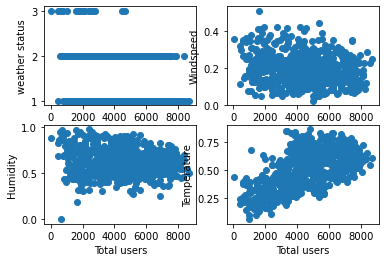

In [27]:
fig, ax = plt.subplots(2, 2) ##creates subplot in format of 2 vertical, 2 horizontal
ax[0, 0].scatter(x = df['cnt'], y = df['weathersit'])
ax[0, 0].set_xlabel("Total users")
ax[0, 0].set_ylabel("weather status")

ax[0, 1].scatter(x = df['cnt'], y = df['windspeed'])
ax[0, 1].set_xlabel("Total users")
ax[0, 1].set_ylabel("Windspeed")

ax[1, 0].scatter(x = df['cnt'], y = df['hum'])
ax[1, 0].set_xlabel("Total users")
ax[1, 0].set_ylabel("Humidity")

ax[1, 1].scatter(x = df['cnt'], y = df['temp'])
ax[1, 1].set_xlabel("Total users")
ax[1, 1].set_ylabel("Temperature")

plt.show()
##uses subplot function of matplotlib to show the 4 scatterplots showing total users on the x axis and then the 4 
## different variables on the y axis for weather situation, windspeed, humidity, temperature

If we take a look at the dataset we can see they have recorded a few more weather features, weather status (1 is clear, 2 is misty or cloudy, 3 is rain), windspeed, humidity and temperature. A quick look at the scatterplots above shows that the uptake in bike rentals is reliant on the type of weather, on days with higher windspeed the numbers are also lower, humidity doesn't seem to have a big effect but numbers are definately higher on days where the temperature is neither too high or too low 

In [28]:
wea= bkdata.groupby('weathersit').sum()
avg= bkdata.groupby('weathersit').mean()
print('Totals and average by weathertype')
print(wea['cnt'], avg['cnt'])
##groups the data by weathersit and prints the totals and averages

Totals and average by weathertype
weathersit
1    2257952
2     996858
3      37869
Name: cnt, dtype: int64 weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: cnt, dtype: float64


## Weather calculations
***

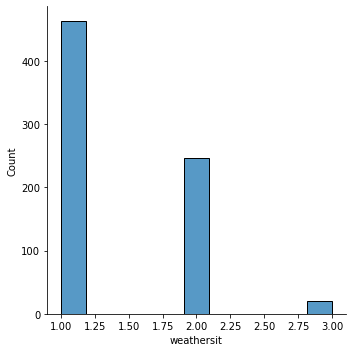

In [29]:
sns.displot(bkdata, x='weathersit')
## uses seaborn to give a simple barchart of the total count of weathertypes

In [30]:
one = bkdata['weathersit'].value_counts()[1]
print(one)

two = bkdata['weathersit'].value_counts()[2]
print(two)

three = bkdata['weathersit'].value_counts()[3]
print(three)
##creates 3 variables, one for each weather type, prints the total occurrances of each

463
247
21


I did the above calculation to see how often the weather type 3(bad weather) occured, but 21 days in 2 years would mean they didn't have a huge effect on the data

In [31]:
std= bkdata.cnt.std() 
print(std)
##uses the .std() function to get the standard deviation of the data in column cnt

1937.2114516187678


## Replicating the data
***

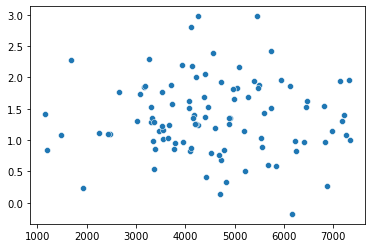

In [32]:
group = np.random.normal(loc=4504,scale=1307,size=100)
weather = np.random.normal(loc=1.3,scale=0.544894342, size=100)
sns.scatterplot(x=group,y=weather)
plt.show()
##use the numpy random function to create 2 variables, group, with the mean 4504 and standard deviation 1307, which we got in
##calculations above, and weather using 1 and 0.544. I created 100 instances of each and used seaborn scatterchart to plot
##the results

## Conclusion
***

Looking at the plot above the results of the simulated data look similar to the real data in that most of the 100 days look to be between 4000 and 5000. This is a basic simulation and it would be possible to make it even more accurate with more calculations around the weekdays and weather data. 